Differential Expression and Grouping of Genes in DEX stimulation

In [2]:
import scanpy as sc
import scvi
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Preprocessing
Import Data

In [3]:
rawPath = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Datasets", "DUSP1", "A1-2_sc_Bulk_GSE141834", 'GSE141834_scRNAseq_rawCounts.txt')
adata = sc.read_text(rawPath).T


In [4]:
adata

AnnData object with n_obs × n_vars = 2400 × 32049

In [5]:
sc.pp.filter_genes(adata, min_cells = 10)
sc.pp.filter_cells(adata, min_genes = 100)
#sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')


In [6]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [7]:
adata.X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.]], dtype=float32)

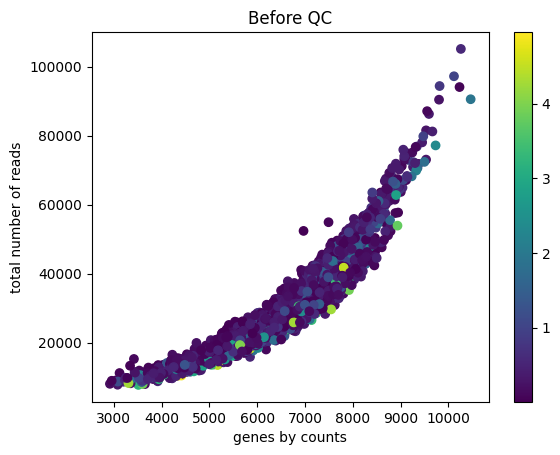

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
plt.scatter(adata.obs['n_genes_by_counts'], adata.obs['total_counts'], c=adata.obs['pct_counts_mt'])
plt.xlabel('genes by counts')
plt.ylabel('total number of reads')
plt.title("Before QC")
plt.colorbar()
plt.show()
"""upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
adata = adata[adata.obs.n_genes_by_counts < upper_lim]
adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]"""
adata.X

In [9]:
adata.layers['counts'] = adata.X

In [10]:
adata.layers['counts']

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
""" FUCK IT
# Make os path object to loc
normalizedPath = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Datasets", "DUSP1", "A1-2_sc_Bulk_GSE141834", 'GSE141834_scRNAseq_seuratV3_normalized.txt')

# Read in the data
adata1 = sc.read_text(normalizedPath).T
adata1.obs_names = obs_names
adata1.var_names = var_names
print(adata1.X)
adata1 = adata1[adata.obs_names, adata.var_names]

adata.layers['logp'] = adata1.X.copy()
print(adata1.X)
"""


' FUCK IT\n# Make os path object to loc\nnormalizedPath = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "Datasets", "DUSP1", "A1-2_sc_Bulk_GSE141834", \'GSE141834_scRNAseq_seuratV3_normalized.txt\')\n\n# Read in the data\nadata1 = sc.read_text(normalizedPath).T\nadata1.obs_names = obs_names\nadata1.var_names = var_names\nprint(adata1.X)\nadata1 = adata1[adata.obs_names, adata.var_names]\n\nadata.layers[\'logp\'] = adata1.X.copy()\nprint(adata1.X)\n'

In [12]:
adata.X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 2., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

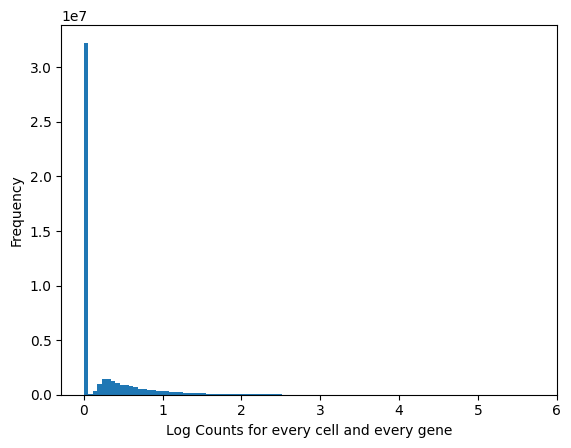

In [14]:
plt.hist(adata.X.flatten(), bins=100)
plt.xlabel('Log Counts for every cell and every gene')
plt.ylabel('Frequency')
plt.show()



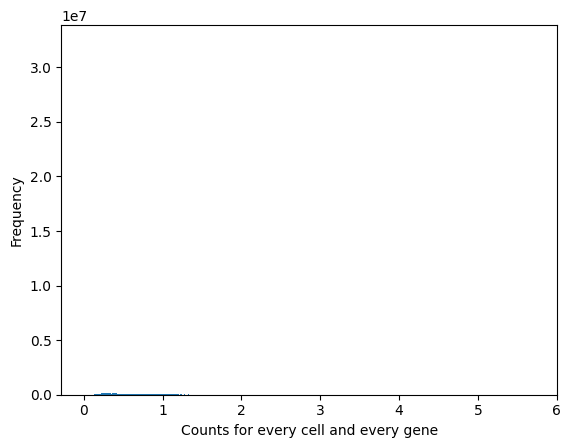

array([4949.431 , 3959.8042, 3647.6094, ..., 4448.373 , 4188.9893,
       4756.816 ], dtype=float32)

In [15]:
plt.hist(adata.layers['counts'].flatten(), bins=1000)
plt.xlabel('Counts for every cell and every gene')
plt.ylabel('Frequency')
'''plt.xlim(10, 200)
plt.ylim(0, 10000)'''
plt.show()

adata.layers['counts'].sum(axis = 1)

In [16]:
adata.obs['Timepoint'] = [x.split('.')[1] for x in adata.obs_names]
adata.obs['Treatment'] = [x.split('.')[0] for x in adata.obs_names]

adata.obs['Timepoint'] = adata.obs['Timepoint']
adata.obs['Treatment'] = adata.obs['Treatment']

In [17]:
adata

AnnData object with n_obs × n_vars = 2400 × 19841
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Timepoint', 'Treatment'
    var: 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts'

Select highly_variable genes

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


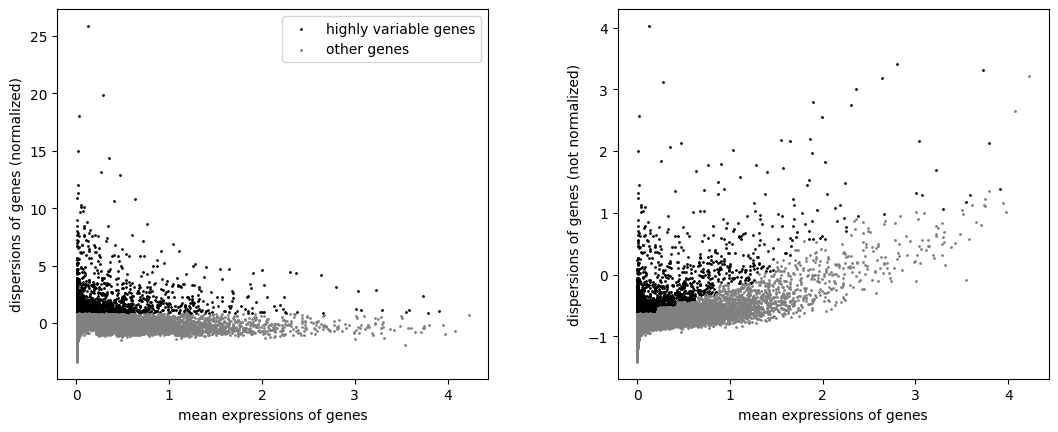

In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
sc.pl.highly_variable_genes(adata)

In [19]:
'DUSP1' in adata.var.highly_variable

True

In [20]:
adata.var.highly_variable

CTSH          False
SFXN4         False
AC127537.3    False
DCAF8L1       False
RBM45         False
              ...  
PLXNA2         True
CD4           False
PCDH17         True
AC004264.2     True
CHI3L2         True
Name: highly_variable, Length: 19841, dtype: bool

In [21]:
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


# Lower dimensional Representation

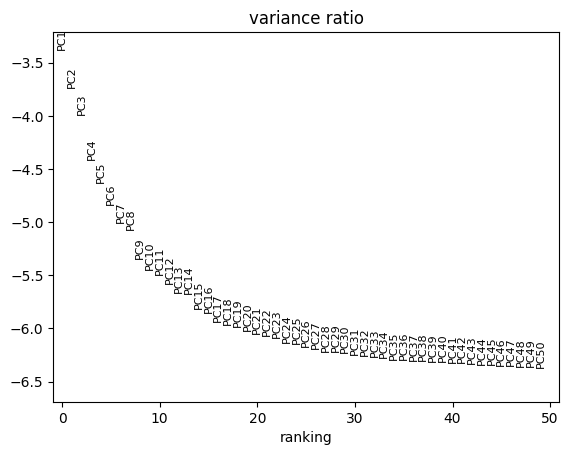

In [23]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

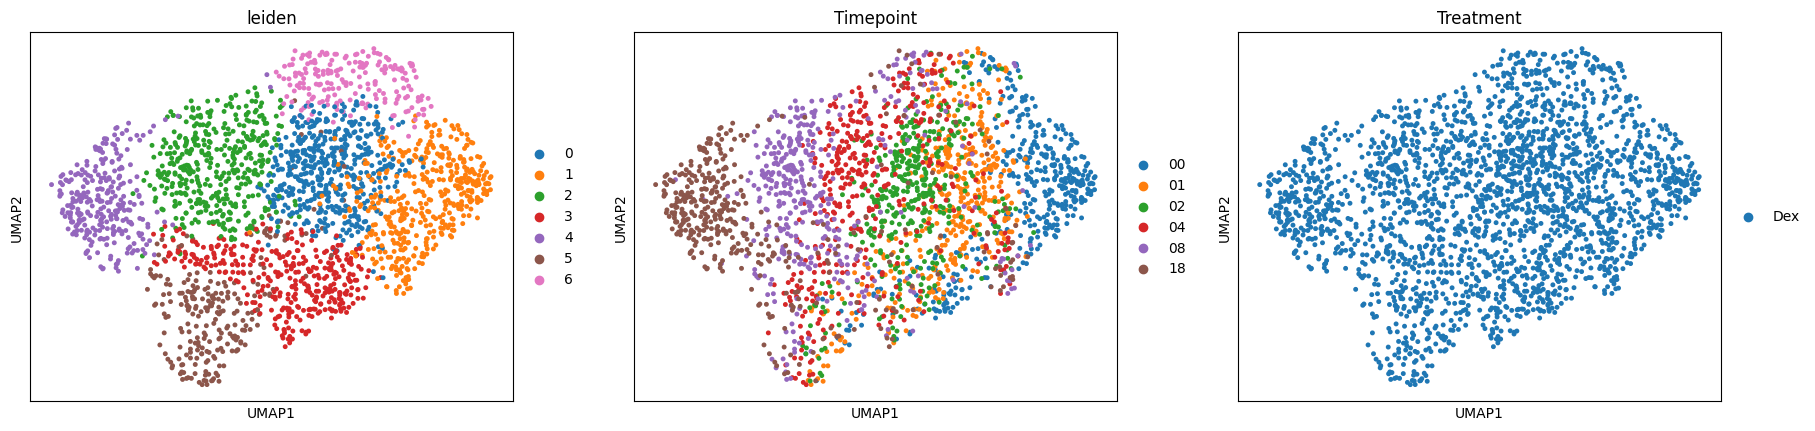

In [24]:
sc.pp.neighbors(adata, n_pcs = 30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden', 'Timepoint', 'Treatment'])

scVI model - Remove dataselection errors

In [25]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])
model = scvi.model.SCVI(adata)
model.train()

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/400:   0%|          | 2/400 [00:00<02:02,  3.25it/s, v_num=1, train_loss_step=1.16e+3, train_loss_epoch=1.22e+3]

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████| 400/400 [01:02<00:00,  6.55it/s, v_num=1, train_loss_step=699, train_loss_epoch=713]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:02<00:00,  6.36it/s, v_num=1, train_loss_step=699, train_loss_epoch=713]


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

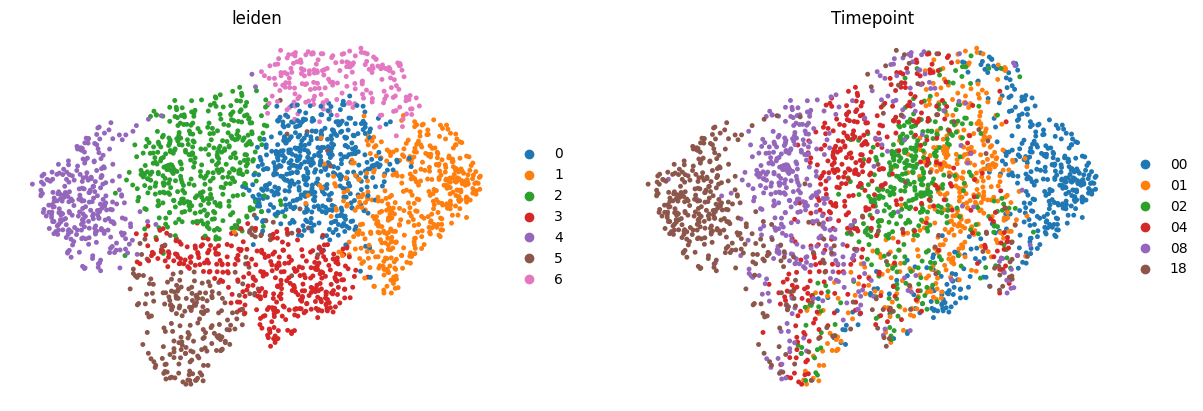

In [26]:
adata.obsm['X_scVI'] = model.get_latent_representation()
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = ['leiden', 'Timepoint'], frameon = False)

In [27]:
sc.tl.rank_genes_groups(adata, 'Timepoint')

In [28]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
1,00,HSPA1A,25.601770,1.539042,3.983733e-95,3.293385e-92
2,00,RPS10,23.878836,0.710612,3.693358e-89,2.714071e-86
3,00,PPDPF,23.653883,0.571635,2.060494e-87,1.362742e-84
4,00,DSCAM-AS1,19.865547,0.870204,1.032578e-69,4.552753e-67
5,00,PTMS,19.652388,0.781853,1.017620e-66,4.038119e-64
...,...,...,...,...,...,...
100680,18,ACSL6,2.590419,3.671339,9.927990e-03,4.881815e-02
100686,18,AC073094.1,2.587304,1.439533,9.974021e-03,4.900806e-02
100687,18,YPEL2,2.585628,0.840136,1.002173e-02,4.915097e-02
100688,18,ABCC3,2.584646,0.789155,1.002898e-02,4.915890e-02


In [29]:
markers_scvi = model.differential_expression(groupby = 'Timepoint')
markers_scvi

DE...: 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9720,0.0280,3.547151,7.945119e-06,0.000115,0.0,0.25,-3.235564,-3.237828,2.015958,...,0.000000,0.063098,0.0000,0.1495,0.000000,1.170292,True,00 vs Rest,00,Rest
IP6K3,0.9646,0.0354,3.305001,2.147899e-06,0.000039,0.0,0.25,-3.331786,-3.331213,2.271107,...,0.000000,0.024162,0.0000,0.0685,0.000000,0.429889,True,00 vs Rest,00,Rest
KCNG1,0.9622,0.0378,3.236913,3.704494e-05,0.000247,0.0,0.25,-2.370103,-2.353257,1.412285,...,0.016132,0.117494,0.0475,0.2725,0.361018,2.227858,True,00 vs Rest,00,Rest
SGK1,0.9594,0.0406,3.162540,5.029373e-05,0.000305,0.0,0.25,-2.280241,-2.295866,1.506491,...,0.000735,0.171638,0.0025,0.3405,0.012973,3.282335,True,00 vs Rest,00,Rest
AC011899.2,0.9592,0.0408,3.157417,2.294626e-07,0.000004,0.0,0.25,-2.898313,-2.832734,2.702950,...,0.000000,0.004238,0.0000,0.0100,0.000000,0.074396,True,00 vs Rest,00,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSP90AA1,0.3388,0.6612,-0.668646,5.438820e-03,0.005803,0.0,0.25,-0.094981,-0.097399,0.238349,...,2.993935,2.990398,1.0000,1.0000,58.374126,61.416862,False,18 vs Rest,18,Rest
TP53I11,0.3246,0.6754,-0.732711,2.114997e-03,0.002263,0.0,0.25,-0.096518,-0.095001,0.236209,...,1.092827,1.074206,0.9650,0.9685,21.216742,22.053936,False,18 vs Rest,18,Rest
THBS1,0.3220,0.6780,-0.744596,2.166066e-03,0.002300,0.0,0.25,-0.087703,-0.083631,0.233434,...,1.056883,1.145855,0.9625,0.9725,20.331043,23.263069,False,18 vs Rest,18,Rest
MAPT,0.3040,0.6960,-0.828322,7.606707e-04,0.000788,0.0,0.25,-0.051334,-0.045559,0.246923,...,0.415229,0.376119,0.7075,0.6660,8.004786,7.657701,False,18 vs Rest,18,Rest


In [30]:
help(model.differential_expression)

Help on method differential_expression in module scvi.model.base._rnamixin:

differential_expression(adata: Optional[anndata._core.anndata.AnnData] = None, groupby: Optional[str] = None, group1: Optional[Iterable[str]] = None, group2: Optional[str] = None, idx1: Union[Sequence[int], Sequence[bool], str, NoneType] = None, idx2: Union[Sequence[int], Sequence[bool], str, NoneType] = None, mode: Literal['vanilla', 'change'] = 'change', delta: float = 0.25, batch_size: Optional[int] = None, all_stats: bool = True, batch_correction: bool = False, batchid1: Optional[Iterable[str]] = None, batchid2: Optional[Iterable[str]] = None, fdr_target: float = 0.05, silent: bool = False, weights: Optional[Literal['uniform', 'importance']] = 'uniform', filter_outlier_cells: bool = False, importance_weighting_kwargs: Optional[dict] = None, **kwargs) -> pandas.core.frame.DataFrame method of scvi.model._scvi.SCVI instance
    A unified method for differential expression analysis.
    
    Implements ``'vani

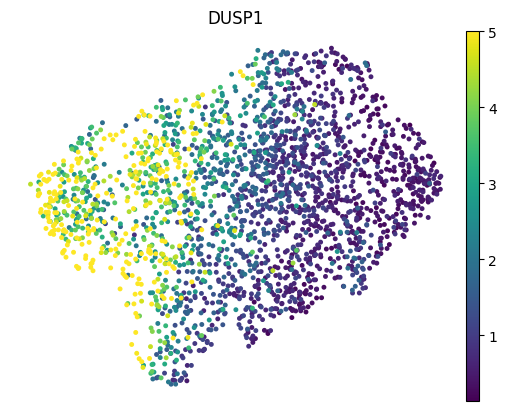

In [31]:
sc.pl.umap(adata, color = ['DUSP1'], frameon = False, layer = 'scvi_normalized', vmax = 5)

In [32]:
adata.write_h5ad('integrated.h5ad')

In [33]:
model.save('model.model')

ValueError: model.model already exists. Please provide another directory for saving.

In [ ]:
adata = sc.read('integrated.h5ad')

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [34]:
dfObsNames = pd.DataFrame(adata.obs_names)
dfObsNames.to_csv('obs_names.csv') # thank you chat gtp

In [35]:
dfVarNames = pd.DataFrame(adata.var_names)
dfVarNames.to_csv('var_names.csv') # thank you chat gtp
lsChecks = [
    'day', 'DUSP1', 'hashtag', 'timepoint', 'treatment', 'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day',
    'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day', 'treatment_timepoint', 'treatment_timepoint_day', 'hash',
    'tag' 

]

new_tags = ['experiment_id', 'sample_id', 'batch', 'cell_type', 
            'condition', 'replicate', 'protocol', 'operator', 'date', 
            'location', 'species', 'strain', 'sex', 'age', 'developmental_stage', 
            'tissue', 'organ', 'cell_line', 'disease_state', 'platform', 'sequencing_depth', 
            'read_length', 'library_type', 'experiment_type', 'analysis_software', 'sample', 'type', 'name', 'id', 'group',
            'experiment', 'cell', adata.var_names[483]]

lsChecks.extend(new_tags)

new_tags = ['genotype', 'phenotype', 'molecule', 'barcode', 'cell_cycle', 'population', 
            'cluster', 'subpopulation', 'marker', 'antibody', 'probe', 'primer', 'temperature', 
            'humidity', 'pressure', 'light_cycle', 'food_source', 'lifecycle_stage', 'growth_conditions', 
            'experiment_conditions', 'lab', 'researcher', 'project', 'publication', 'cycle', 'dex', adata.var_names[1849], 'GH', 'dusp']


lsChecks.extend(new_tags)
print(len(lsChecks))
for i in lsChecks:
    for name in adata.var_names:
        if i.lower() in name.lower():
            print(f'{i} is in the var_names, {name}')




79
DUSP1 is in the var_names, DUSP13
DUSP1 is in the var_names, DUSP1
DUSP1 is in the var_names, DUSP14
age is in the var_names, GAGE1
age is in the var_names, MAGED2
age is in the var_names, MAGEA4
age is in the var_names, MAGEC2
age is in the var_names, PAGE1
age is in the var_names, MAGEA11
age is in the var_names, MAGEB2
id is in the var_names, ID1
id is in the var_names, MID1IP1
id is in the var_names, ID3
id is in the var_names, JARID2
id is in the var_names, ID2
id is in the var_names, ARID5B
AC135048.1 is in the var_names, AC135048.1
GHR is in the var_names, GHRL
GHR is in the var_names, GHRH
GHR is in the var_names, GHR
GH is in the var_names, GHRL
GH is in the var_names, GHRH
GH is in the var_names, IGHA1
GH is in the var_names, GHR
dusp is in the var_names, DUSP13
dusp is in the var_names, DUSP1
dusp is in the var_names, DUSP4
dusp is in the var_names, DUSP5
dusp is in the var_names, DUSP14


# DE comparing one group to all

Filtering

In [36]:
possible_markers = markers_scvi
possible_markers

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9720,0.0280,3.547151,7.945119e-06,0.000115,0.0,0.25,-3.235564,-3.237828,2.015958,...,0.000000,0.063098,0.0000,0.1495,0.000000,1.170292,True,00 vs Rest,00,Rest
IP6K3,0.9646,0.0354,3.305001,2.147899e-06,0.000039,0.0,0.25,-3.331786,-3.331213,2.271107,...,0.000000,0.024162,0.0000,0.0685,0.000000,0.429889,True,00 vs Rest,00,Rest
KCNG1,0.9622,0.0378,3.236913,3.704494e-05,0.000247,0.0,0.25,-2.370103,-2.353257,1.412285,...,0.016132,0.117494,0.0475,0.2725,0.361018,2.227858,True,00 vs Rest,00,Rest
SGK1,0.9594,0.0406,3.162540,5.029373e-05,0.000305,0.0,0.25,-2.280241,-2.295866,1.506491,...,0.000735,0.171638,0.0025,0.3405,0.012973,3.282335,True,00 vs Rest,00,Rest
AC011899.2,0.9592,0.0408,3.157417,2.294626e-07,0.000004,0.0,0.25,-2.898313,-2.832734,2.702950,...,0.000000,0.004238,0.0000,0.0100,0.000000,0.074396,True,00 vs Rest,00,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSP90AA1,0.3388,0.6612,-0.668646,5.438820e-03,0.005803,0.0,0.25,-0.094981,-0.097399,0.238349,...,2.993935,2.990398,1.0000,1.0000,58.374126,61.416862,False,18 vs Rest,18,Rest
TP53I11,0.3246,0.6754,-0.732711,2.114997e-03,0.002263,0.0,0.25,-0.096518,-0.095001,0.236209,...,1.092827,1.074206,0.9650,0.9685,21.216742,22.053936,False,18 vs Rest,18,Rest
THBS1,0.3220,0.6780,-0.744596,2.166066e-03,0.002300,0.0,0.25,-0.087703,-0.083631,0.233434,...,1.056883,1.145855,0.9625,0.9725,20.331043,23.263069,False,18 vs Rest,18,Rest
MAPT,0.3040,0.6960,-0.828322,7.606707e-04,0.000788,0.0,0.25,-0.051334,-0.045559,0.246923,...,0.415229,0.376119,0.7075,0.6660,8.004786,7.657701,False,18 vs Rest,18,Rest


In [37]:
possible_markers = possible_markers[(possible_markers['is_de_fdr_0.05']) & (abs(possible_markers.lfc_mean) > 0.25)]
possible_markers[possible_markers['group2'] == 18]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2


In [38]:
markers = {}
for c in adata.obs.Timepoint.cat.categories:
    print(c)
    cell_df = possible_markers.loc[possible_markers.group1 == c]
    markers[c] = cell_df.index.tolist()[:5]
markers

00
01
02
04
08
18


{'00': ['PHACTR3', 'IP6K3', 'KCNG1', 'SGK1', 'AC011899.2'],
 '01': [],
 '02': [],
 '04': [],
 '08': ['AC008759.3', 'INHBE', 'PCDH17', 'AC004241.4', 'KRT6A'],
 '18': ['KRT6A', 'SGPP2', 'AC008759.3', 'PCDH17', 'SAA1']}

In [39]:
# artifically add a gene that is not differentially expressed
markers['02'] = ['DUSP1']

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be

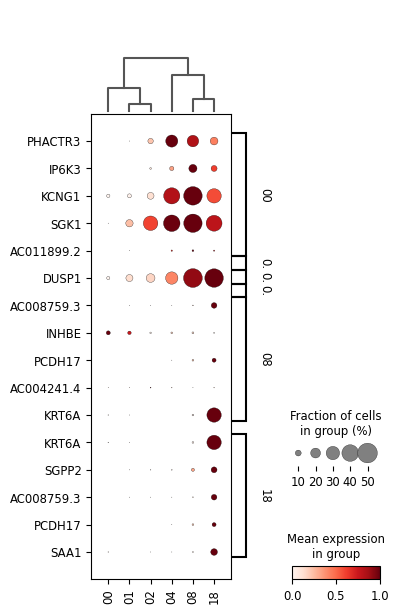

In [40]:
sc.pl.dotplot(adata, markers, groupby = 'Timepoint', swap_axes = True,
             use_raw = True, standard_scale = 'var', dendrogram = True)



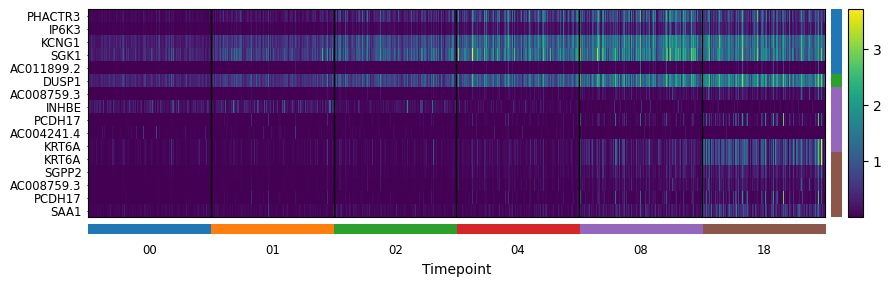

In [41]:
sc.pl.heatmap(adata, markers, groupby='Timepoint', swap_axes=True, layer = 'scvi_normalized',
              log = True)

Timepoint by timepoint DE

In [42]:
t2t = []
for t1 in adata.obs.Timepoint.cat.categories:
    for t2 in adata.obs.Timepoint.cat.categories:
        if t1 != t2:
            markers_scvi = model.differential_expression(groupby = 'Timepoint', group1 = t1, group2 = t2)
            t2t.append(markers_scvi)

DE...: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


In [43]:
df = pd.concat(t2t)

df.to_csv('differential_expression.csv')

In [44]:
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
TVP23A,0.9406,0.0594,2.762224,0.000003,0.000003,0.0,0.25,-0.294484,-0.525632,3.424946,...,0.003200,0.001402,0.0100,0.0050,0.062130,0.026744,False,00 vs 01,00,01
AC126389.1,0.9402,0.0598,2.755087,0.000003,0.000002,0.0,0.25,0.582299,0.617560,3.114393,...,0.003037,0.000000,0.0100,0.0000,0.068132,0.000000,False,00 vs 01,00,01
U47924.1,0.9400,0.0600,2.751535,0.000004,0.000003,0.0,0.25,0.816298,0.876538,3.211533,...,0.004075,0.001205,0.0100,0.0025,0.091800,0.029506,False,00 vs 01,00,01
AC011466.4,0.9390,0.0610,2.733941,0.000005,0.000006,0.0,0.25,-0.204125,-0.330972,2.825082,...,0.008595,0.004060,0.0225,0.0100,0.165760,0.080732,False,00 vs 01,00,01
AC004241.4,0.9384,0.0616,2.723514,0.000003,0.000003,0.0,0.25,0.321114,-0.085713,4.417187,...,0.001617,0.001771,0.0025,0.0025,0.027847,0.034238,False,00 vs 01,00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEAF6,0.3136,0.6864,-0.783342,0.001646,0.001566,0.0,0.25,0.075085,0.070706,0.237498,...,0.855389,0.914368,0.9325,0.9300,16.193384,17.226143,False,18 vs 08,18,08
MAPT,0.3004,0.6996,-0.845394,0.000756,0.000751,0.0,0.25,0.010765,0.019644,0.247188,...,0.415229,0.384112,0.7075,0.6750,8.004786,7.329930,False,18 vs 08,18,08
EFHD1,0.2786,0.7214,-0.951417,0.003605,0.003254,0.0,0.25,0.148103,0.144336,0.168205,...,1.972016,1.710397,0.9975,0.9975,38.091167,32.653946,False,18 vs 08,18,08
TP53I11,0.2494,0.7506,-1.101815,0.002116,0.002112,0.0,0.25,0.002695,0.003369,0.225080,...,1.092827,1.068890,0.9650,0.9625,21.216742,20.443270,False,18 vs 08,18,08


In [45]:
possible_markers = df[(df['is_de_fdr_0.05']) & (abs(df.lfc_mean) > 0.5)]
possible_markers

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9672,0.0328,3.383976,8.121636e-06,5.177619e-05,0.0,0.25,-2.516443,-2.584194,1.663148,...,0.000000,0.027282,0.0000,0.0900,0.000000,0.555584,True,00 vs 02,00,02
SGK1,0.9498,0.0502,2.940236,5.003762e-05,1.848452e-04,0.0,0.25,-1.787922,-1.802507,1.250362,...,0.000735,0.142419,0.0025,0.3350,0.012973,2.888742,True,00 vs 02,00,02
KCNG1,0.9490,0.0510,2.923583,3.730773e-05,1.337142e-04,0.0,0.25,-1.754699,-1.777374,1.100283,...,0.016132,0.040227,0.0475,0.1225,0.361018,0.833407,True,00 vs 02,00,02
KLF15,0.9472,0.0528,2.886999,1.004550e-04,3.146609e-04,0.0,0.25,-1.578704,-1.584193,0.992909,...,0.019409,0.182364,0.0550,0.4375,0.420883,3.788736,True,00 vs 02,00,02
IP6K3,0.9458,0.0542,2.859350,2.182081e-06,1.052921e-05,0.0,0.25,-2.153272,-2.177284,1.703301,...,0.000000,0.005065,0.0000,0.0200,0.000000,0.097889,True,00 vs 02,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SGPP2,0.9430,0.0570,2.806015,3.597746e-05,9.228685e-06,0.0,0.25,1.858774,1.950290,2.109247,...,0.033820,0.001731,0.1000,0.0075,0.628527,0.032254,True,18 vs 04,18,04
OLAH,0.9428,0.0572,2.802300,3.331058e-06,8.224085e-07,0.0,0.25,1.864319,1.930418,2.296480,...,0.007860,0.000000,0.0200,0.0000,0.150812,0.000000,True,18 vs 04,18,04
DNAAF1,0.9426,0.0574,2.798598,1.901984e-06,5.993153e-06,0.0,0.25,-1.937153,-1.991145,1.941723,...,0.001966,0.011051,0.0050,0.0325,0.041422,0.211510,True,18 vs 04,18,04
AC004241.4,0.9546,0.0454,3.045780,9.229459e-07,1.797649e-06,0.0,0.25,-0.990724,-1.084517,5.292619,...,0.001412,0.000841,0.0050,0.0025,0.024325,0.014792,True,18 vs 08,18,08


In [46]:
markers = {}
for c in adata.obs.Timepoint.cat.categories:
    for c2 in adata.obs.Timepoint.cat.categories:
        if c == '00' and c2 == '02':
            print('----')
            print(c)
            print(c2)
            cell_df = possible_markers.loc[possible_markers.group1 == c]
            cell_df = cell_df.loc[cell_df.group2 == c2]
            markers[c + c2] = cell_df.index.tolist()[:5]
markers

----
00
02


{'0002': ['PHACTR3', 'SGK1', 'KCNG1', 'KLF15', 'IP6K3']}

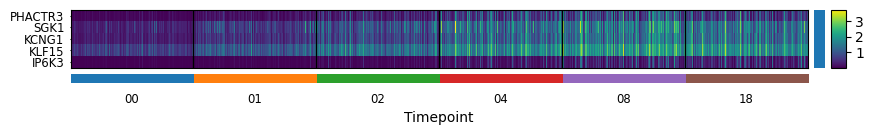

In [47]:
sc.pl.heatmap(adata, markers, groupby='Timepoint', swap_axes=True, layer = 'scvi_normalized',
              log = True)

Shits and giggles

In [48]:
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
TVP23A,0.9406,0.0594,2.762224,0.000003,0.000003,0.0,0.25,-0.294484,-0.525632,3.424946,...,0.003200,0.001402,0.0100,0.0050,0.062130,0.026744,False,00 vs 01,00,01
AC126389.1,0.9402,0.0598,2.755087,0.000003,0.000002,0.0,0.25,0.582299,0.617560,3.114393,...,0.003037,0.000000,0.0100,0.0000,0.068132,0.000000,False,00 vs 01,00,01
U47924.1,0.9400,0.0600,2.751535,0.000004,0.000003,0.0,0.25,0.816298,0.876538,3.211533,...,0.004075,0.001205,0.0100,0.0025,0.091800,0.029506,False,00 vs 01,00,01
AC011466.4,0.9390,0.0610,2.733941,0.000005,0.000006,0.0,0.25,-0.204125,-0.330972,2.825082,...,0.008595,0.004060,0.0225,0.0100,0.165760,0.080732,False,00 vs 01,00,01
AC004241.4,0.9384,0.0616,2.723514,0.000003,0.000003,0.0,0.25,0.321114,-0.085713,4.417187,...,0.001617,0.001771,0.0025,0.0025,0.027847,0.034238,False,00 vs 01,00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEAF6,0.3136,0.6864,-0.783342,0.001646,0.001566,0.0,0.25,0.075085,0.070706,0.237498,...,0.855389,0.914368,0.9325,0.9300,16.193384,17.226143,False,18 vs 08,18,08
MAPT,0.3004,0.6996,-0.845394,0.000756,0.000751,0.0,0.25,0.010765,0.019644,0.247188,...,0.415229,0.384112,0.7075,0.6750,8.004786,7.329930,False,18 vs 08,18,08
EFHD1,0.2786,0.7214,-0.951417,0.003605,0.003254,0.0,0.25,0.148103,0.144336,0.168205,...,1.972016,1.710397,0.9975,0.9975,38.091167,32.653946,False,18 vs 08,18,08
TP53I11,0.2494,0.7506,-1.101815,0.002116,0.002112,0.0,0.25,0.002695,0.003369,0.225080,...,1.092827,1.068890,0.9650,0.9625,21.216742,20.443270,False,18 vs 08,18,08


In [49]:
len(set(df.index))

2000

In [50]:
outputdf = pd.DataFrame(columns=list(set(df['comparison'])) ,index=list(set(df.index)))
for i in set(df.index):
    for j in set(df['comparison']):
        if int(j[:2]) < int(j[-2:]):
            possible_rows = df[(df.index == i) & (df['comparison'] == j)]
            #print(possible_rows['lfc_mean'])
            outputdf.loc[i, j]= possible_rows['lfc_mean'].values[0]
outputdf.dropna(axis=1, how='all', inplace=True)

In [51]:
outputdf.dropna(axis=1, how='all', inplace=True)

In [52]:
outputdf.to_csv('differential_expression_DR.csv')
outputdf

,00 vs 02,01 vs 08,02 vs 08,00 vs 18,01 vs 02,02 vs 04,00 vs 01,04 vs 08,04 vs 18,00 vs 08,08 vs 18,00 vs 04,01 vs 18,01 vs 04,02 vs 18
AC144450.1,0.456285,0.186015,0.189787,0.73225,0.016586,-0.128078,0.47106,0.264222,0.30918,0.555934,0.064288,0.238196,0.271009,-0.155747,0.135485
HMGB1P40,-0.123482,-0.279929,-0.085741,-0.158248,-0.154123,0.073635,-0.003219,-0.134873,-0.073652,-0.261725,0.0936,-0.14498,-0.19493,-0.141581,-0.032977
RASGEF1B,-0.435429,0.289169,0.330406,0.108053,-0.040554,0.038727,-0.392129,0.277744,0.491059,-0.105019,0.225214,-0.381159,0.517919,0.019975,0.528961
FBP1,0.240211,0.509994,0.46727,0.856388,0.008941,0.374734,0.230683,0.102525,0.275554,0.738658,0.142656,0.621525,0.617761,0.38202,0.640475
JPH1,-0.178729,0.350846,0.347242,0.265697,0.003818,0.040497,-0.169209,0.288479,0.386388,0.166936,0.0932,-0.110145,0.46448,0.068239,0.445523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCDC116,0.427586,1.013798,0.943125,1.36667,0.028132,0.756339,0.398106,0.154844,0.174662,1.379077,-0.012247,1.119049,0.919117,0.73351,0.86957
AC012313.3,-0.214096,0.160169,0.11396,0.379896,0.023516,-0.130915,-0.233658,0.244937,0.658492,-0.141814,0.456508,-0.381915,0.591615,-0.108861,0.527537
AC091825.1,-0.444852,-0.896078,-0.668518,-0.909225,-0.179904,-0.56221,-0.263054,-0.079773,0.053849,-1.163802,0.20111,-1.073584,-0.656419,-0.794233,-0.528108
CDC20,0.186518,0.131909,0.176713,0.471281,-0.015294,0.133299,0.176315,0.059966,0.221318,0.3322,0.148382,0.292198,0.30096,0.116469,0.344783


In [53]:
import umap

reducer = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2)

In [54]:
embedding = reducer.fit_transform(outputdf[:].to_numpy())

Text(0.5, 1.0, 'UMAP projection of the Log Fold Changes dataset')

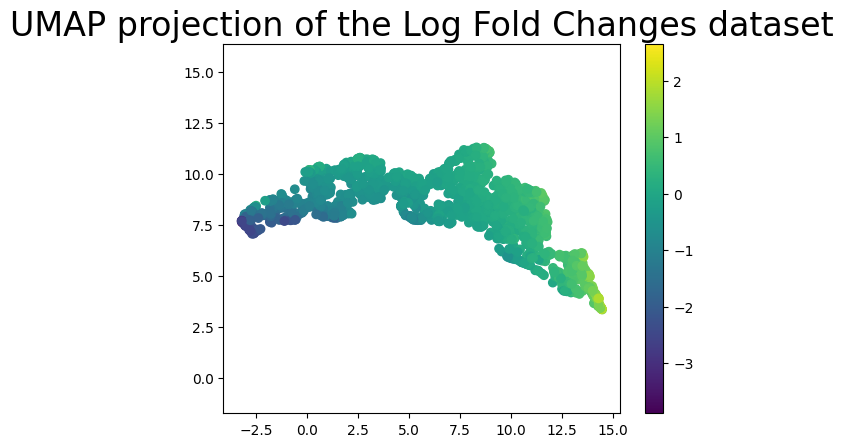

In [55]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = outputdf.loc[:, '00 vs 04'])
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Log Fold Changes dataset', fontsize=24)

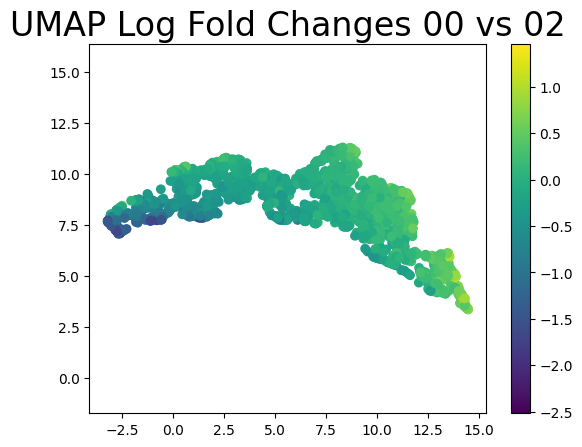

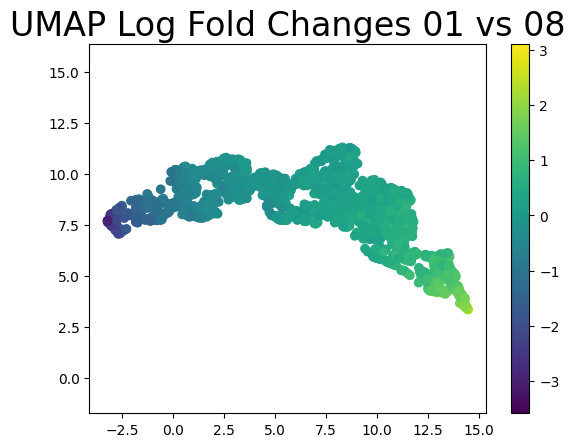

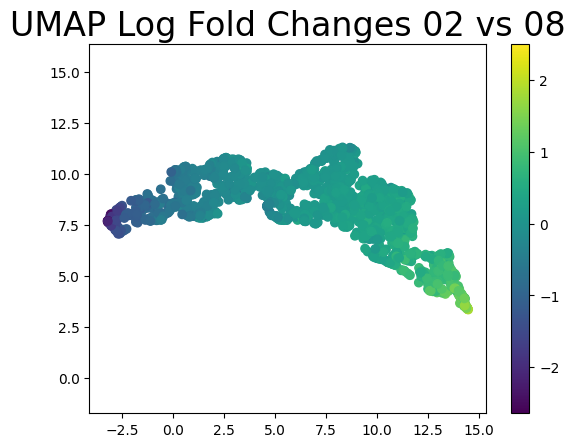

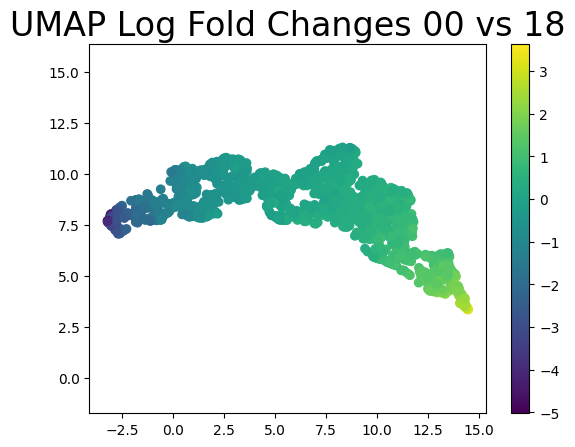

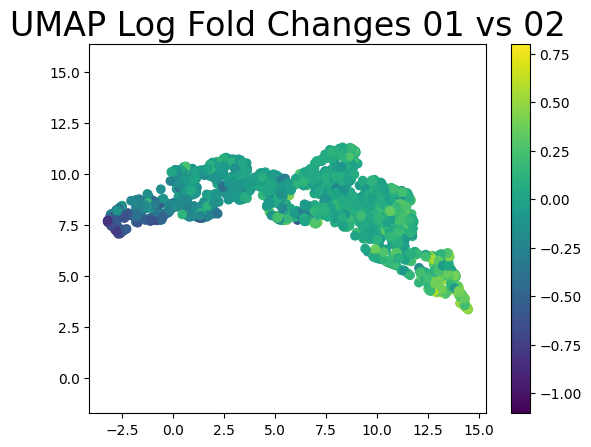

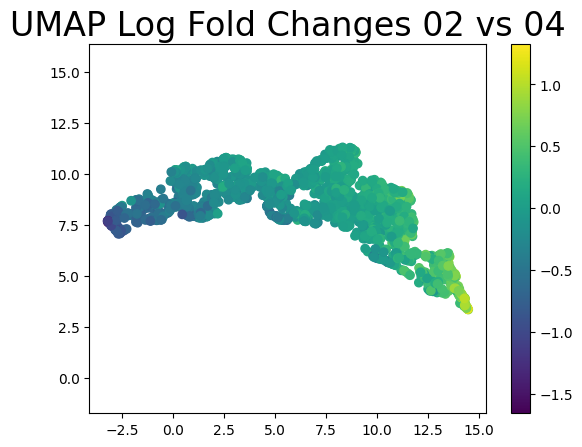

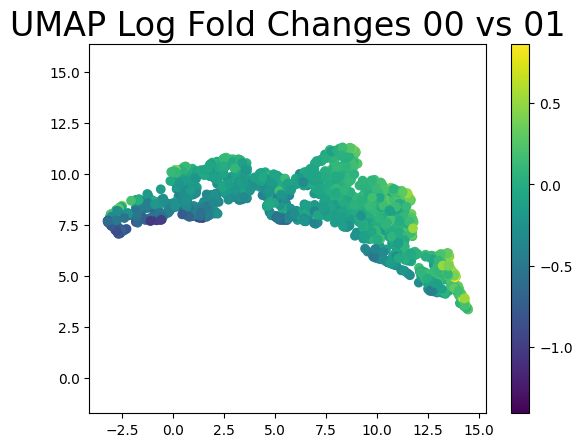

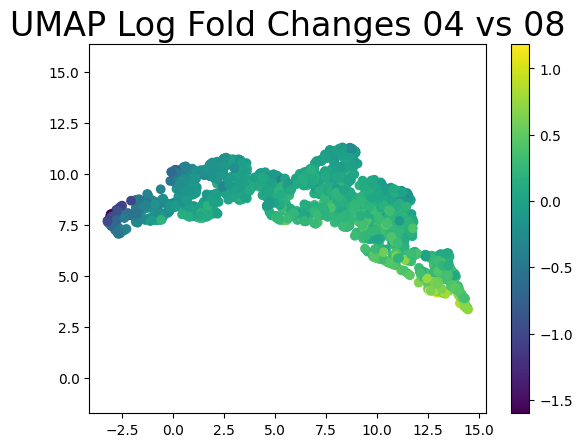

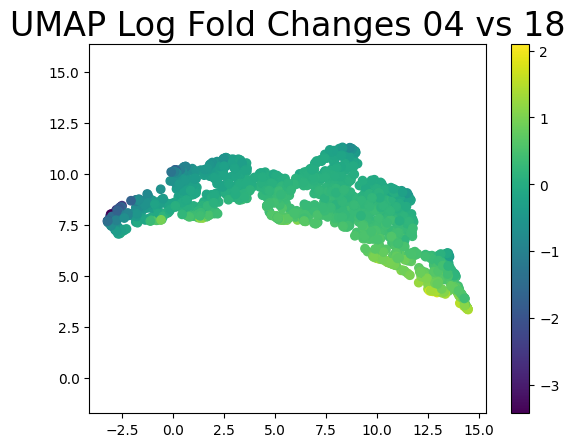

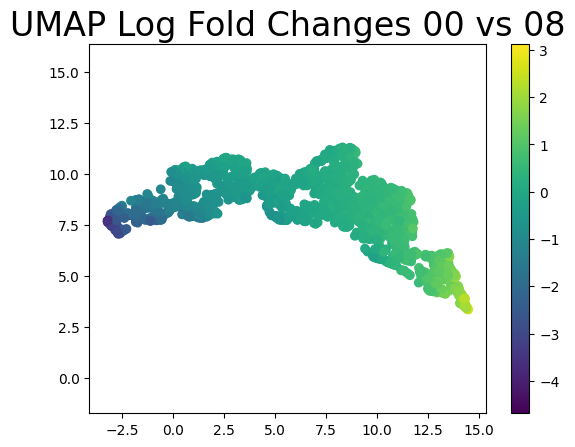

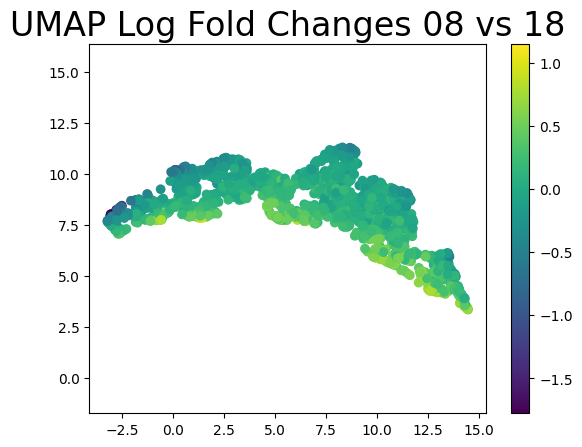

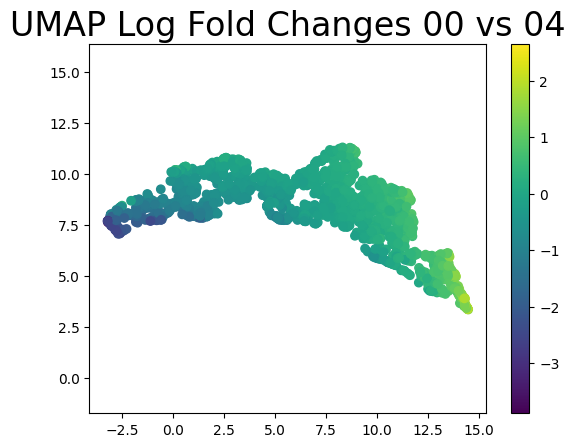

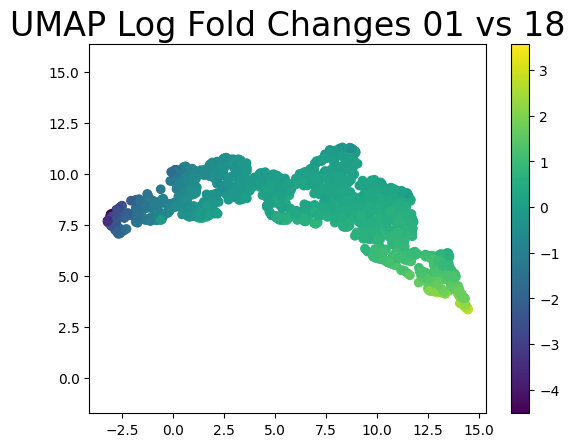

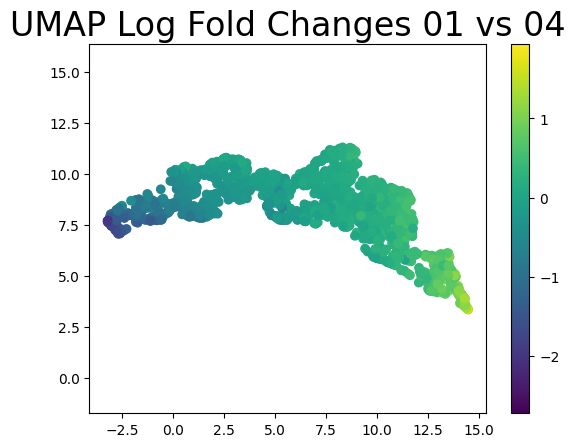

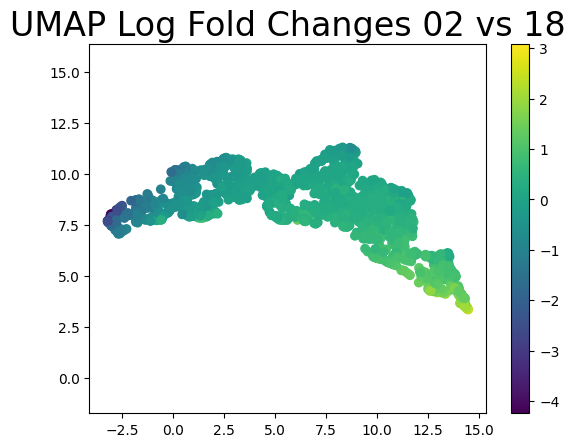

In [56]:
# lets do all of them
for k in outputdf.keys():
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c = outputdf.loc[:, k])
    plt.colorbar()
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP Log Fold Changes {k}', fontsize=24)
    plt.show()

In [57]:
outputdf.keys()

Index(['00 vs 02', '01 vs 08', '02 vs 08', '00 vs 18', '01 vs 02', '02 vs 04',
       '00 vs 01', '04 vs 08', '04 vs 18', '00 vs 08', '08 vs 18', '00 vs 04',
       '01 vs 18', '01 vs 04', '02 vs 18'],
      dtype='object')

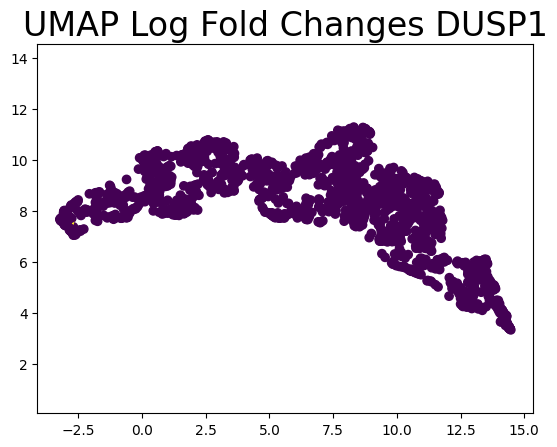

In [58]:
colors = np.zeros(len(outputdf.loc[:, k]))
colors[outputdf.index == 'DUSP1'] = 1 
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = colors)
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP Log Fold Changes DUSP1', fontsize=24)
plt.show()

In [59]:
data = np.zeros([adata.shape[0], 2])
data[:, 0] = adata.obs['Timepoint']
data[:, 1] = np.round(adata[:, 'DUSP1'].layers['scvi_normalized'].flatten()*36)

In [60]:
data = pd.DataFrame(data, columns = ['Timepoint', 'DUSP1'])
data.to_csv('DUSP1.csv')